In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Daily_Demand_Forecasting_Orders.csv')

In [11]:
data.loc[:30, 'isExp'] = 0
data.loc[30:, 'isExp'] = 1

In [12]:
data.head()

,Week of the month,Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders),isExp
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577,0.0
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675,0.0
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412,0.0
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120,0.0
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517,0.0


In [13]:
data['y_new'] = data['Target (Total orders)'] + data['isExp'] * 50 + np.random.normal(0, 1, 60)

In [15]:
data.head()

,Week of the month,Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders),isExp,y_new
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577,0.0,539.552262
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675,0.0,225.137127
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412,0.0,129.006579
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120,0.0,316.916894
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517,0.0,209.932428


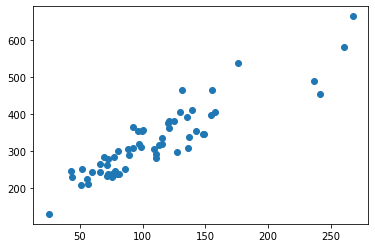

In [16]:
plt.scatter(data['Order type B'], data.y_new)

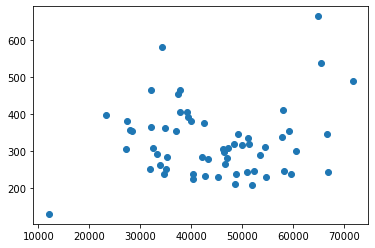

In [17]:
plt.scatter(data['Orders from the traffic controller sector'], data.y_new)

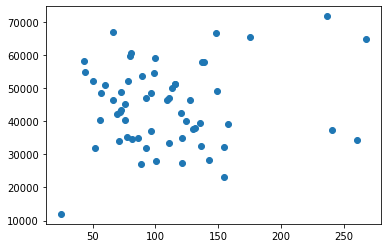

In [18]:
plt.scatter(data['Order type B'], data['Orders from the traffic controller sector'])

In [33]:
a = pd.DataFrame(np.array([0]*15 + [1]*45))

In [34]:
b = pd.DataFrame(np.random.normal(0, 1, 60))

In [47]:
df = pd.concat([a+b, b**2, b**3, a*2, a], axis=1)
df.columns=['x1', 'x2', 'x3', 'x4', 'x5']

In [48]:
df.head()

,x1,x2,x3,x4,x5
0,-0.637529,0.406443,-0.259119,0,0
1,0.749560,0.561841,0.421134,0,0
2,1.364479,1.861802,2.540390,0,0
3,-0.333211,0.111029,-0.036996,0,0
4,1.379677,1.903509,2.626228,0,0


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
X = df
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,4.977456,x1
1,1.727081,x2
2,3.543429,x3
3,inf,x4
4,inf,x5
